# Two Dimension Histogram Filter

## Part 1: Exploring the code
In this section, I'll confirm some existing codes. 

### 1.import function

In [3]:
## This code "imports" code from some of the other files
import simulate as sim
import helpers
import localizer

# for dealing with python2 as python3
from __future__ import division, print_function

# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=reload
%load_ext autoreload
%autoreload 2

### 2. Initial setting for robot simulation

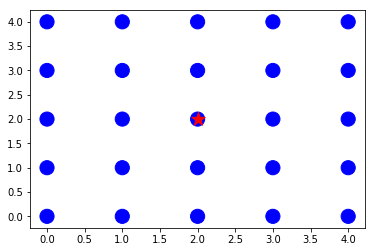

In [58]:
# This code defines a 5 * 5 robot world with initial belief.
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

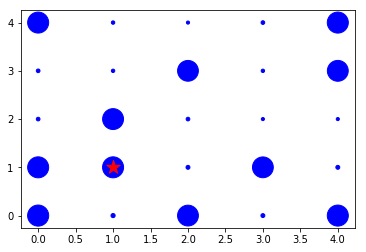

In [60]:
# This code try 1 simulation of robot.
simulation.run(1)
simulation.show_beliefs()

### 3.About beliefs that the robot have for making decition.

In [6]:
# This code indicates values of beliefs.
def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end=" ")
        print()

In [8]:
show_rounded_beliefs(simulation.beliefs)

0.069 0.003 0.069 0.002 0.002 
0.070 0.070 0.069 0.002 0.002 
0.070 0.004 0.070 0.003 0.069 
0.003 0.069 0.070 0.070 0.069 
0.002 0.069 0.003 0.069 0.002 


# Part 2: Implement a 2D sense function
In this section, I'll create the sense function in localizer.py.  
And I'll verify the function.

In [10]:
reload(localizer)

def test_sense():
    """
    This code verify the sense function in localizer.py
    """
    
    
    R = 'r'
    _ = 'g'
    
    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]
    
    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]
    
    observation = R
    
    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]
    
    p_hit = 3.0
    p_miss =1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)
    
    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
    
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect Height")
        return
    
    elif len(beliefs_after_sensing[0]) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
    
    total_probability = 0.0
    for  row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        print("Your beliefs appear to not be normalized")
        return

    print("Someshing isn't quite right with your sense function")
    
test_sense()

Tests pass! Your sense function is working as expected


### Integration Testing

In [11]:
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'
grid =[
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

#Use small value for blur to reduce the uncertainty in MOTION
blur = 0.1
p_hit = 100
simulation = sim.Simulation(grid, blur, p_hit)

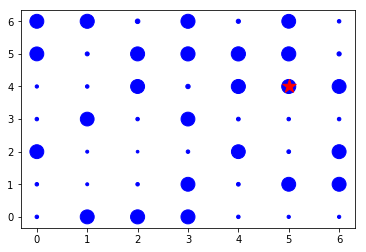

In [15]:
simulation.run(1)
simulation.show_beliefs()

# Part3: Identify and Reproduce a Bug

A user of your robot called tech support with a compaint

> "So I was using your robot in a square room and everything was fine.
Then I tried loading in a map for a rectangular room and it drove around for a couple seconds 
and then suddenly stopped working. Fix it!"

Now we have to debug. We are going to use a systematic approach.
1. Reproduce the bug
2. Read and understand the error message
3. Write a test that triggers the bug
4. Generate a hypothesis for the cause of the bug
5. Try a solution. If it fixes the bug, great! If not, go back to step 4.

### Step 1: Reproduce the bug

The user said that rectangular environments seem to be causing the bug.
I create the code for reproducing the bug.

In [64]:
from simulate import Simulation
import simulate as sim
import helpers
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'
grid =[
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
]

#Use small value for blur to reduce the uncertainty in MOTION
blur = 0.1
p_hit = 100
simulation = sim.Simulation(grid, blur, p_hit)

# remember, the user said that the robot would sometimes drive around for a bit...
# It may take several calls to "simulation.run" to actually trigger the bug.
simulation.run(1)
simulation.show_beliefs()

IndexError: list index out of range

### Step 2:Read and Understand the error message

The error message is "list index out of range" in localizer.py.  
This means accessing invalid indice of the python list.
> https://blog.finxter.com/python-indexerror-list-index-out-of-range/


In [79]:
# Example
list_A = ["A","B","C"]

list_A[4]

IndexError: list index out of range

### Step3:Write a test that reproduces the bug

I confirmed about the bug to use the following script in the rectangle room.  
In the script, I changed the number of similation. Then I confimed the number that is nessarary for occuring the bug. 

In [103]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
    reload(localizer)
    reload(sim)
    reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(3):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

4


IndexError: list index out of range

### Step4:Generate a Hypothesis

In order to have a guess about what's causing the problem, I will use Python debugging tool.
I use the `pdb` module (`p`ython `d`e`b`ugger)

#### Setting up the debugger 
1. Open `localizer.py` and uncomment the line to the top that says `import pdb`
2. Just before the line of code that is causing the bug `new_G[int(new_i)][int(new_j)] = cell`, add a new line of code that says `pdb.set_trace()`
3. Run your test by calling your test function (run the cell below this one)
4. You should see a text entry box pop up! For now, type `c` into the box and hit enter to **c**ontinue program execution. Keep typing `c` and enter until the bug is triggered again

In [105]:
test_robot_works_in_rectangle_world()

4
4


IndexError: list index out of range

#### Result
The lists of new_G and beliefs have height is 4 rows and width is 7 columns.  
Therefore, a value is inserted to the range of these lists.  
But, a value is inserted to the out of list new_G range at the line 64 by new_i that is calculated by width.  
So, I have to fix it to change the line 61 and 62.

### Step 5:Write a Fix

I will fix the code in the localizer.py by using the confirmation result.

Wrong code
```
    new_i = (i + dy ) % width
    new_j = (j + dx ) % height
```

Fixed code
```
    new_i = (i + dy ) % height
    new_j = (j + dx ) % width
```

In [106]:
test_robot_works_in_rectangle_world()

4
4
4
